# Predictive Maintenance Dataset
## Failure prediction model
Data simulates the real predictive maintenance encounted in the industry, the goal of this project
is to build a machine learning model to predict whether a failure will occured based on the attributes provided



In [2]:
# Path to the CSV file
path = "./archive/predictive_maintenance.csv"

print("Path to dataset files:", path)

Path to dataset files: ./archive/predictive_maintenance.csv


In [4]:
# Libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder


In [5]:
df = pd.read_csv(path)
df

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure
...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,No Failure
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,No Failure
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,No Failure
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,No Failure


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [10]:
column_list = list(df.columns)
column_list

['UDI',
 'Product ID',
 'Type',
 'Air temperature [K]',
 'Process temperature [K]',
 'Rotational speed [rpm]',
 'Torque [Nm]',
 'Tool wear [min]',
 'Target',
 'Failure Type']

In [12]:
df.drop(columns='UDI', inplace=True)
df.head()

,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [14]:
# Clean the dataset by remove column that cannot be processed
df.drop(columns='Failure Type', inplace=True)
df.head()# Check for any duplicates in the data
df.duplicated("Product ID").sum()

0

In [16]:
# Check for any duplicates in the data
df.duplicated("Product ID").sum()

0

In [18]:
df.drop(columns='Product ID', inplace=True)
df.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
0,M,298.1,308.6,1551,42.8,0,0
1,L,298.2,308.7,1408,46.3,3,0
2,L,298.1,308.5,1498,49.4,5,0
3,L,298.2,308.6,1433,39.5,7,0
4,L,298.2,308.7,1408,40.0,9,0


In [20]:
# Data cleaning checks
df.isna().sum()

Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
dtype: int64

In [22]:
df.describe()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


In [24]:
# Processes text values is mapped to numbers 0, 1, 2
df['Type'] = LabelEncoder().fit_transform(df['Type'])

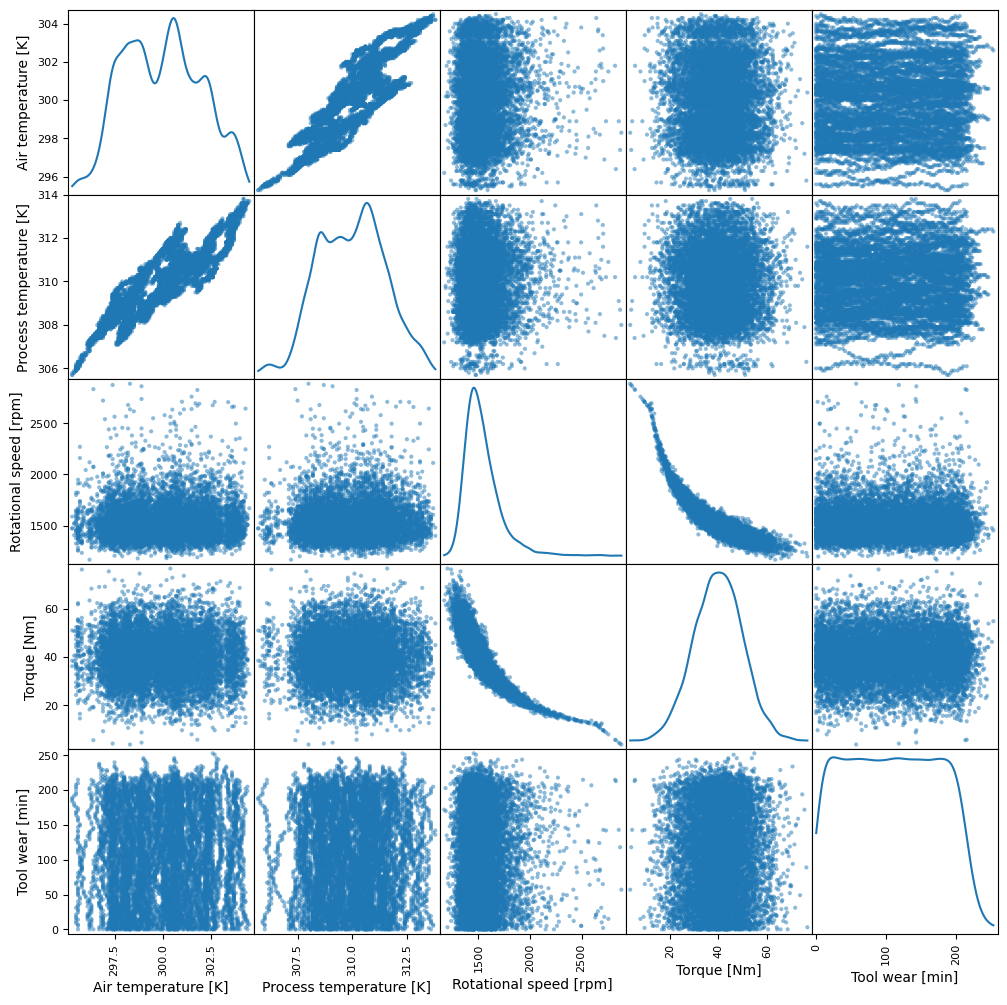

In [26]:
# Recognise a rough correlation and distribution between some of the numberical features 
# using a scatter matrix
column_name = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]'] 
pd.plotting.scatter_matrix(df[column_name], figsize=(12, 12), diagonal='kde')
plt.show()

In [ ]:
# Shows there is a linear relationship between Air temperature and the Process temperature
# thus showing there are no issues such as overheating or cooling failures
# Tool wear has no correlation with either process temperature or air temperature
# There seems to be outliers in tool wear there might be some underlying issues
# that is causing this issue 

<Axes: >

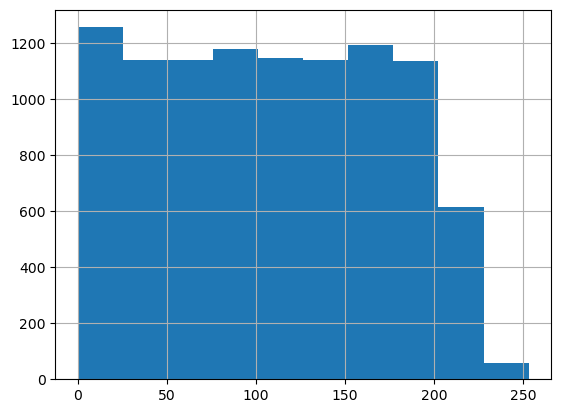

In [28]:
df['Tool wear [min]'].hist()

In [30]:
plt.figure(figsize=(100, 100))
sns.boxplot(y=df['Tool wear [min]'])

plt.show()

In [116]:
# Handling the outlier in tool wear
# wear_mode = df['Tool wear [min]'].mode()[0]
# d = df['Tool wear [min]']
# ind = d[d == d.max()].index
# df.loc[ind[0], 'Tool wear [min]'] = wear_mode

In [34]:
df['Tool wear [min]'].describe()

count    10000.000000
mean       107.951000
std         63.654147
min          0.000000
25%         53.000000
50%        108.000000
75%        162.000000
max        253.000000
Name: Tool wear [min], dtype: float64

# Random Forest Classification

In [36]:
# Importing the Random forest library
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

In [38]:
# Splitting data set into training data and testing data
from sklearn.model_selection import train_test_split
X = df.drop(columns=['Target'])
Y = df['Target']
# 80% used for training and 20 used for testing
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [40]:
# Fitting the model
clf.fit(x_train, y_train)

RandomForestClassifier()

In [42]:
# Predcting failure 
y_preds = clf.predict(x_test)
y_preds

array([0, 0, 0, ..., 0, 0, 0])

In [44]:
clf.score(x_train, y_train)

1.0

In [46]:
clf.score(x_test, y_test)

0.9895

In [48]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [50]:
confusion_matrix(y_test, y_preds)

array([[1936,    1],
       [  20,   43]])

In [52]:
accuracy_score(y_test, y_preds) 

0.9895

In [54]:
# precision, recall, f1-score
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1937
           1       0.98      0.68      0.80        63

    accuracy                           0.99      2000
   macro avg       0.98      0.84      0.90      2000
weighted avg       0.99      0.99      0.99      2000



# Logistic Regression

In [258]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [260]:
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [262]:
model.score(x_test, y_test)

0.973

In [264]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1937
           1       0.98      0.68      0.80        63

    accuracy                           0.99      2000
   macro avg       0.98      0.84      0.90      2000
weighted avg       0.99      0.99      0.99      2000



# Comparision and Improvement

In [147]:
from sklearn.model_selection import cross_val_score
df.columns

Index(['Type', 'Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Target'],
      dtype='object')

In [149]:
# Compute Pearson correlation between each feature and the target
correlations = df.corr()['Target'].drop('Target')
print("Feature Correlations:\n", correlations.values)

Feature Correlations:
 [-0.0051525   0.08255569  0.03594597 -0.04418756  0.19132078  0.10544822]


In [190]:
# Based on the previous cell, Rotational speed [rpm] has the least correlation to the failure
# therefore we check the accuracy without rotational speed
#df = df.drop(columns=['Rotational speed [rpm]'])
X = df.drop(columns=['Target'])
Y = df['Target']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
clf.score(x_test, y_test)

0.9805

In [ ]:
# Removing the Rotational speed column has reduced the accuracy of the predective model
# This maybe due to complexity of the model decreasing or there might be some valuable information when it combines with other inputs

In [202]:
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
model.score(x_test, y_test)

0.9705

In [62]:
# Saves the dataset
import pickle
with open("predictive_maintenability_failure.pkl", "wb") as file:
    pickle.dump(clf, file) 

df.to_csv('predective_maintenance.csv', index=False)

# Comparing the predictions to the Target

In [70]:
# Load the trained model
with open("predictive_maintenability_failure.pkl", "rb") as file:  # Corrected model loading
    clf = pickle.load(file)

df['Predicted_Failure_Probability'] = df['Predicted_Failure_Probability'].round()
df['Prediction_vs_Actual'] = df['Prediction_vs_Actual'].round()

# Compare predicted results with actual targets
df['Prediction_vs_Actual'] = df['Predicted_Failure_Probability'] - df['Target']

# Save the results
df.to_csv('predictions_with_comparison.csv', index=False)